In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from utils import compute_accuracy, get_train_test_dataset, show_result

In [2]:
(train_images, train_labels), (test_images, test_labels) = get_train_test_dataset(size=128)

In [3]:
train_image_data = train_images.reshape(train_images.shape[0], -1)
print(train_image_data.shape)  # (100, 128*128*3)

test_image_data = test_images.reshape(test_images.shape[0], -1)
print(test_image_data.shape)  # (20, 128*128*3)

knn = KNeighborsClassifier(
    n_neighbors=3,
    n_jobs=-1,
).fit(
    train_image_data,
    train_labels,
)


(100, 49152)
(20, 49152)


In [4]:
train_result = knn.predict(train_image_data)
test_result = knn.predict(test_image_data)

trafficlight: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 67]


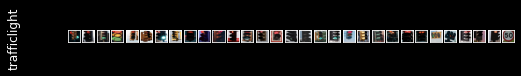

stop: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 58 62 70 72]


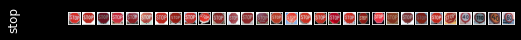

speedlimit: [57 59 60 61 63 64 65 66 68 69 71]


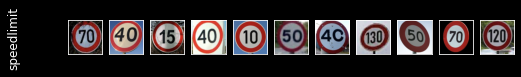

crosswalk: [73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


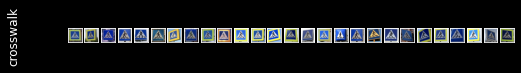

In [5]:
show_result(train_result, train_images)

trafficlight: [0 1 2 3 4]


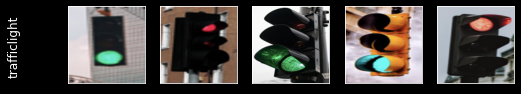

stop: [5 6 7 8 9]


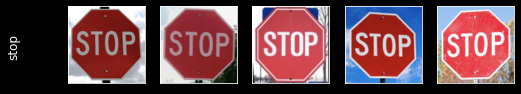

speedlimit: [10 11 12 13 14]


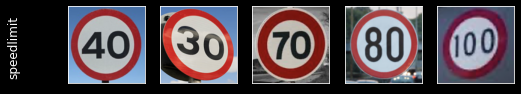

crosswalk: [15 16 17 18 19]


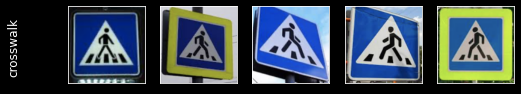

In [6]:
show_result(test_result, test_images)

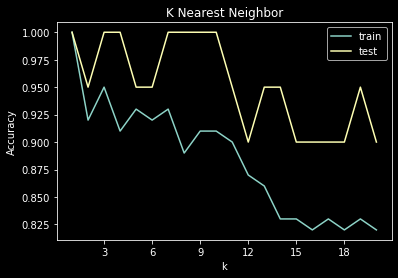

In [7]:
ks = list(range(1, 21))
train_accs = []
test_accs = []

for k in ks:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        n_jobs=-1,
    ).fit(
        train_image_data,
        train_labels,
    )
    train_result = knn.predict(train_image_data)
    test_result = knn.predict(test_image_data)

    train_accuracy = compute_accuracy(train_labels, train_result)
    test_accuracy = compute_accuracy(test_labels, test_result)

    train_accs.append(train_accuracy)
    test_accs.append(test_accuracy)

from matplotlib.ticker import MaxNLocator
plt.figure().gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('K Nearest Neighbor')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(ks, train_accs, label='train')
plt.plot(ks, test_accs, label='test')
plt.legend()
plt.show()